## Important instruction

For programming exercises that only editing, only edit the code as shown in the following format.

```
##############################################

#Edit the following code

var1 = 3
var2 = 4
print(var1 + var4)

##############################################
```

You are open to experimenting with the other parts of code but you will only be awarded points if the question asked is answered which only needs finishing or making changes to the code in the above specified format.

## Question 7: Dimensionality reduction using Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

Your task to implement PCA and t-SNE on Wine dataset from ```sklearn.datasets```. Please follow the below instructions to complete the exercise.

1. Load the Wine dataset from ```sklearn.datasets``` and standardize the features using ```StandardScaler``` from ```sklearn.preprocessing```.
2. The task is to perform PCA on the **standardized data** and experiment with different values of the ```n_components``` parameter. The goal is to find a value of ```n_components``` that captures variance above 90% and less than 95% (Check out ```explained_variance_ratio_``` attribute of PCA from sklearn documentation mentioned in the references).
3. Implement t-SNE on **standardized data** where ```n_components``` parameter value is set to 2 and ```perplexity``` parameter value to 30. Also check the ```perplexity``` parameter value of 1 and note your observations.

For more information, refer to the following resources:
* Sections **6.3: Principal Component Analysis** and **6.13: t-Distributed Stochastic Neighbor Embedding** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydın
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
* https://distill.pub/2016/misread-tsne/



(1, 0.3619884809992633)
(2, 0.5540633835693531)
(3, 0.6652996889318525)
(4, 0.735989990758993)
(5, 0.8016229275554789)
(6, 0.8509811607477047)
(7, 0.8933679539739379)
(8, 0.9201754434577265)
(9, 0.9423969775056237)
(10, 0.9616971684450645)
(11, 0.9790655253449636)
(12, 0.9920478511010057)
(13, 1.0000000000000002)


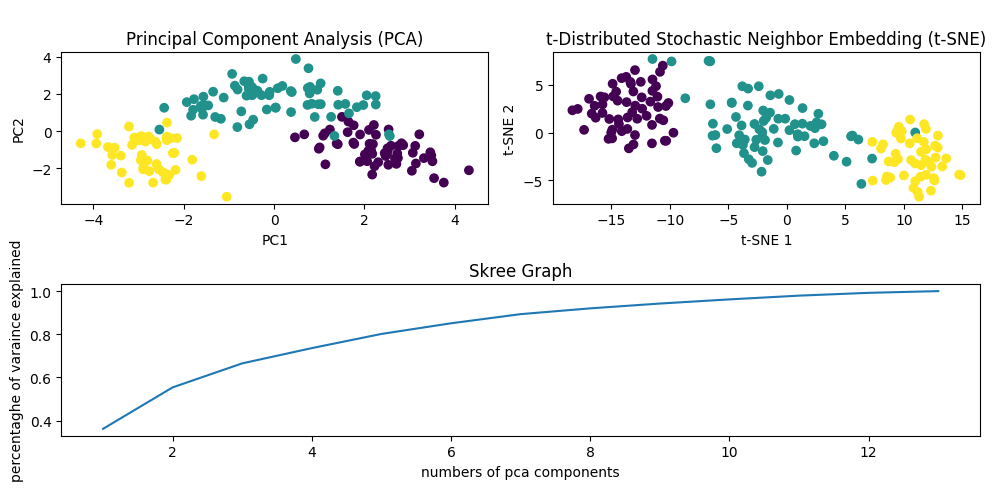

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


############################################################
#Write your code here

# Load and standardize the Wine dataset
wine = load_wine()
X = wine['data']
y = wine['target']

#Standardising the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Perform PCA
max_components = len(X[0])
components_tested = np.arange(1, max_components + 1)
cumulative_explained_variance = []

for num_components in components_tested:
    pca = PCA(n_components=num_components)
    pca.fit_transform(scaled_X)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    cumulative_explained_variance.append(explained_variance)


for comp in zip(components_tested, cumulative_explained_variance):
  print(comp)

pca = PCA(n_components=9)
X_pca = pca.fit_transform(scaled_X)


# print("\nNumber of components to achieve 90-95% of explained variance:", n_components)

# Perform t-SNE

X_tsne = TSNE(n_components=2, learning_rate='auto',
              init='random', perplexity=30).fit_transform(scaled_X)

plt.figure(figsize=(10, 5))

# skree graph
plt.subplot(2, 2, (3, 4))
plt.plot(components_tested[::-1], cumulative_explained_variance[::-1])
plt.title("Skree Graph")
plt.xlabel("numbers of pca components")
plt.ylabel("percentaghe of varaince explained")
############################################################

# Visualizations

# PCA scatter plot
plt.subplot(2,2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("\nPrincipal Component Analysis (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# t-SNE scatter plot
plt.subplot(2,2,2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title("t-Distributed Stochastic Neighbor Embedding (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

plt.tight_layout()
plt.show()

### **Answer the following question with a brief reasoning.**
Having experimented with t-SNE using ```perplexity``` parameter values of 1 and 30, what distinctions did you observe in the visualizations, and which perplexity value do you believe effectively identifies clusters in the data?

When testing both the perplexity of 1 and 30, the seperation changes drastically. At the setting of 30 the graph shows three clear clusters compared to when the perplexity is set to 1 in which there is significant overlap of different colored points. According to documentation and other sources perplexity seems to change the weight when factoring nearby vs. distant points.

## Question 8: Implementing k-Means Clustering.

You have a dataset named 'Mall_Customers.csv,' containing information about customers' annual income and spending score. Your goal is to perform customer segmentation using K-means clustering to identify distinct groups based on their spending behavior and income levels.

1. Select the relevant features for clustering, in this case, 'Annual Income' and 'Spending Score'.
3. Standardize the selected features to ensure equal importance during clustering.
4. Implement K-means clustering with a specified number of clusters. Experiment with different number of clusters and set ```n_clusters``` parameter of KMeans to a number which is clearly differentiates clusters.
5. Assign the cluster labels back to the original dataset.
6. Visualize the results by creating a scatter plot, where the x-axis represents 'Annual Income,' the y-axis represents 'Spending Score,' and the points are color-coded based on the assigned clusters. **Make sure to include, xlabel, ylabel and title to the output plot.**

For more information, refer to the following resources:
* Section **7.3: k-Means Clustering** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydın
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* https://www.w3schools.com/python/matplotlib_scatter.asp


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


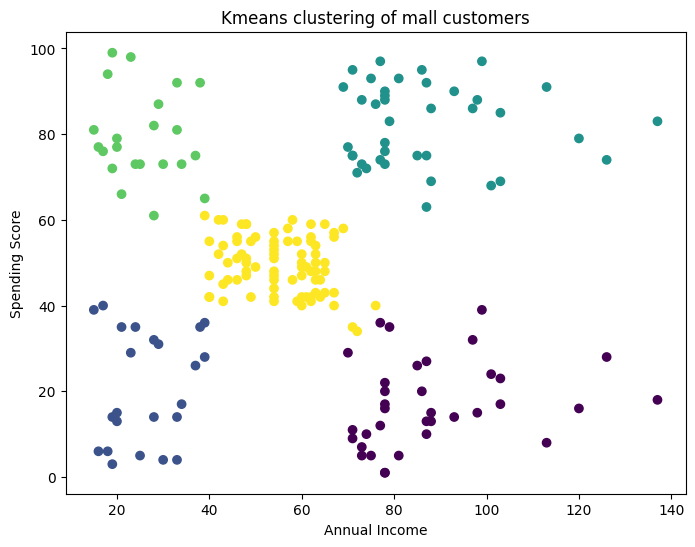

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset (Assuming you have a CSV file called 'customer_data.csv')
data = pd.read_csv('https://raw.githubusercontent.com/KrishnaTejaJ/datasets-CSCI-B455/main/assignment%204/Mall_Customers.csv')

############################################################
#Write your code here

# Select only 'Annual Income' and 'Spending Score'
val = data[['Annual Income','Spending Score']]

# Standardize the features
scaler = StandardScaler()
scaled_val = scaler.fit_transform(val)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_val)

# Assign cluster labels back to the dataset
data['Cluster'] = kmeans.labels_

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income'], data['Spending Score'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Kmeans clustering of mall customers')
plt.show()

############################################################

### **Answer the following question with a brief reasoning.**
What choice of the ```n_clusters``` parameter yields effective clustering results, and what insights were gained from the experimentation?

setting n_clusters to 5 seems to offer the best clustering results, this was found by visually analyzing the data in which there seems to be 5 fairly indepent clusters. This gives insight on how machine learning techniques can be used to gather important information on real world data. Specifically on you can seperate different customer types out, which may allow you to change business practices to target each cluster differently.

## Question 9: Comparing clustering types

Your task to write a python code that will compare Single-Link Clustering, Complete-Link Clustering and k-Means Clustering. Please follow the below instructions to complete the exercise.

1. Load MNIST dataset using ```fetch_opeml``` from ```sklearn.datasets``` and normalise X by dividing it by 255.
2. Perform dimensionality reduction using PCA with ```n_components``` parameter set to 2. (This helps in visualising our final plots)
3. For computational reasons, we will be using only a subset of the data. Select the first 1000 observations of the data and work on those going forward.
4. Implement Single-Link Clustering using ```AgglomerativeClustering()``` with ```n_clusters``` and ```linkage``` parameters set to 10 and 'single' respectively.
5.  Implement Complete-Link Clustering using ```AgglomerativeClustering()``` with ```n_clusters``` and ```linkage``` parameters set to 10 and 'complete' respectively.
6.  Implement k-Means Clustering with ```n_clusters``` and ```random_state``` parameters set to 10 and 99 respectively.
7. Plot Single-Link, Complete-Link and k-Means Clustering using ```plot_clusters(X, labels, title)``` function provided with appropriate titles.


For more information, refer to the following resources:
* Section **7.8:  Hierarchical Clustering** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydın
* https://www.saigeetha.in/post/hierarchical-clustering-types-of-linkages
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


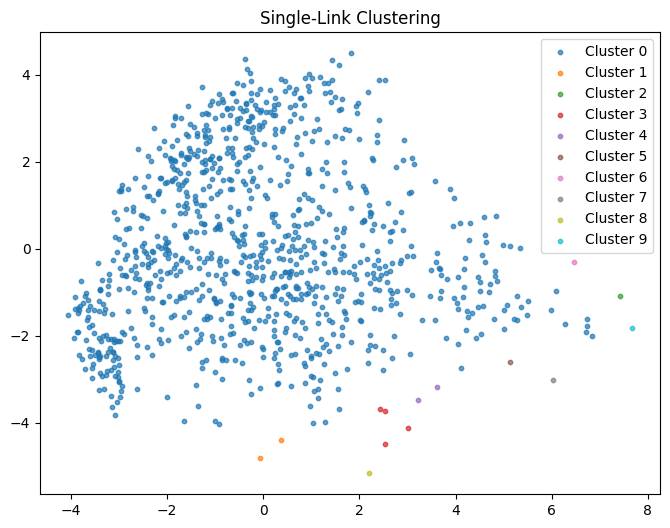

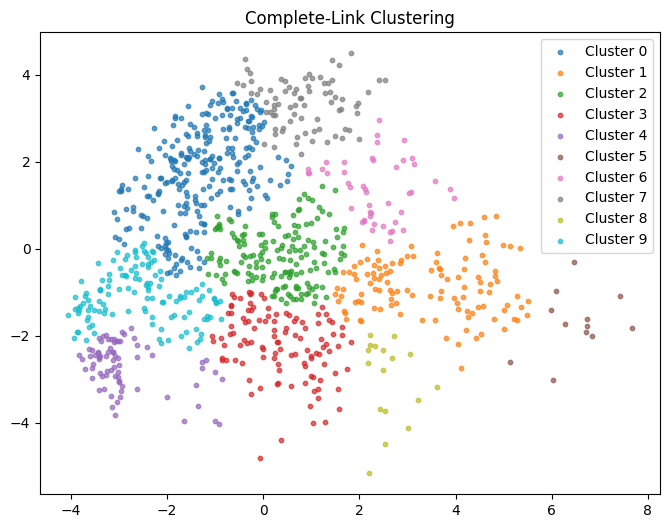

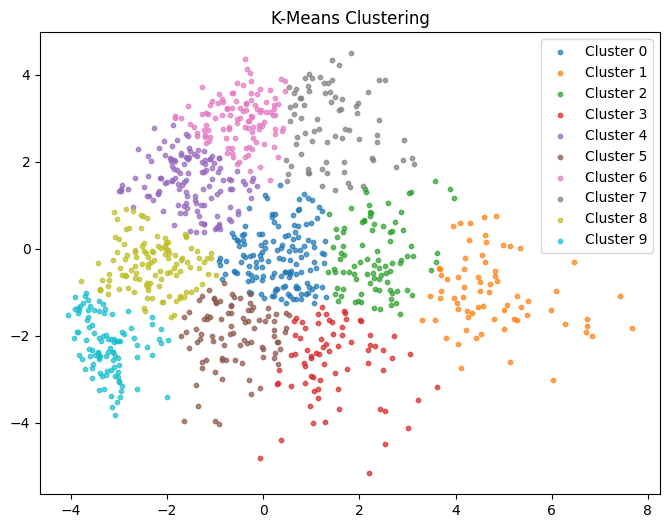

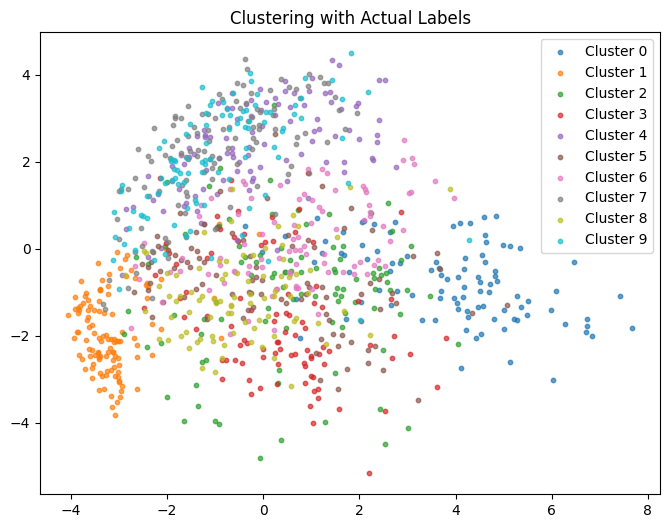

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Function to visualize clustering results
def plot_clusters(X, labels, title):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(8, 6))
    for label in unique_labels:
        cluster_points = X[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', alpha=0.7, s=10)
    plt.title(title)
    plt.legend()
    plt.show()

############################################################
#Write your code here

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X_scaled = X/255.0

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Choose a subset of data
subset_size = 1000
X_subset = X_pca[:subset_size]
y_subset = y[:subset_size]

# Perform single-link clustering
single_link_clustering = AgglomerativeClustering(n_clusters=10, linkage='single')
single_link_labels = single_link_clustering.fit_predict(X_subset)


# Perform complete-link clustering
complete_link_clustering = AgglomerativeClustering(n_clusters=10, linkage='complete')
complete_link_labels = complete_link_clustering.fit_predict(X_subset)

# Perform KMeans clustering for comparison
kmeans_clustering = KMeans(n_clusters=10, random_state=99)
kmeans_labels = kmeans_clustering.fit_predict(X_subset)


plot_clusters(X_subset, single_link_labels, title='Single-Link Clustering')
plot_clusters(X_subset, complete_link_labels, title='Complete-Link Clustering')
plot_clusters(X_subset, kmeans_labels, title='K-Means Clustering')
############################################################

plot_clusters(X_subset, y_subset, title='Clustering with Actual Labels')

### **Answer the following question with a brief reasoning.**
Which clustering method exhibits the least satisfactory performance, and provide any insights gained from examining all three clustering plots and comparing it with the actual label plot.

Single link clustering provides the worse clustering performance. This is because most of the points are categorized into cluster 0 making it hard to differentiate patterns. Another observations I had of the cluster graphs is the shape of each clusters. Due to the mechanisms behind k means in which clusters are created by euclidean distances between points and n_cluster centroids, the shape of each cluster seems to be equally divided where there are no "stray" points in other clusters. It should also be noted the shape and size of each clusters is more similar then complete link clustering. This seems like it would be great for a generic approach in exploratory data analysis but may lack some complexity for advanced data sets where clusters have different shapes.

In [ ]:
!jupyter nbconvert --to html /content/Yeung_Assignment03_Practical.ipynb

In [ ]:
from google.colab import files
files.download('/content/Yeung_Assignment03_Practical.html')